# Regrecion lineal  :round_pushpin:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
dsagro = pd.read_csv('datos/conjunto_de_datos_agro_enigh_2016_ns.csv')
dsagro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13806 entries, 0 to 13805
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    13806 non-null  int64  
 1   foliohog    13806 non-null  int64  
 2   numren      13806 non-null  int64  
 3   id_trabajo  13806 non-null  int64  
 4   tipoact     13806 non-null  int64  
 5   cose_cria   13806 non-null  int64  
 6   prep_deriv  6119 non-null   float64
 7   otro_pago   13806 non-null  int64  
 8   fpago_1     1 non-null      float64
 9   fpago_2     88 non-null     float64
 10  fpago_3     7 non-null      float64
 11  fpago_4     33 non-null     float64
 12  fpago_5     307 non-null    float64
 13  fpago_6     5 non-null      float64
 14  fpago_7     0 non-null      float64
 15  fpago_8     32 non-null     float64
 16  nofpago     13372 non-null  float64
 17  t_emp       13806 non-null  int64  
 18  h_emp       13806 non-null  int64  
 19  m_emp       13806 non-nul

In [39]:
sub_dsagro = dsagro[['folioviv','tipoact', 'ventas_tri', 'gasto_tri','gasneg']]

In [40]:
dsnoagro = pd.read_csv('datos/conjunto_de_datos_noagro_enigh_2016_ns.csv')
dsagro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13806 entries, 0 to 13805
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    13806 non-null  int64  
 1   foliohog    13806 non-null  int64  
 2   numren      13806 non-null  int64  
 3   id_trabajo  13806 non-null  int64  
 4   tipoact     13806 non-null  int64  
 5   cose_cria   13806 non-null  int64  
 6   prep_deriv  6119 non-null   float64
 7   otro_pago   13806 non-null  int64  
 8   fpago_1     1 non-null      float64
 9   fpago_2     88 non-null     float64
 10  fpago_3     7 non-null      float64
 11  fpago_4     33 non-null     float64
 12  fpago_5     307 non-null    float64
 13  fpago_6     5 non-null      float64
 14  fpago_7     0 non-null      float64
 15  fpago_8     32 non-null     float64
 16  nofpago     13372 non-null  float64
 17  t_emp       13806 non-null  int64  
 18  h_emp       13806 non-null  int64  
 19  m_emp       13806 non-nul

In [41]:
agrodumi = pd.get_dummies(data=sub_dsagro["tipoact"], prefix="cat")
agrodumi

,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
13801,1,0,0,0,0,0
13802,0,1,0,0,0,0
13803,0,1,0,0,0,0
13804,1,0,0,0,0,0


In [42]:
sub_dsagro.drop(['tipoact'], axis=1, inplace=True)
sub_dsagro

,folioviv,ventas_tri,gasto_tri,gasneg
0,360164202,21391.16,6314.91,25400
1,360164206,4833.14,2463.06,9907
2,360164223,3866.02,2068.50,8320
3,360164313,0.00,586.95,2400
4,360164313,6847.82,0.00,0
...,...,...,...,...
13801,3260572905,4402.17,1173.91,4800
13802,3260572905,2934.78,1516.30,6200
13803,3260572905,518.47,821.73,3360
13804,3260578401,2531.24,855.97,3500


In [43]:
sub_dsagro = pd.concat([sub_dsagro, agrodumi], axis=1)
sub_dsagro

,folioviv,ventas_tri,gasto_tri,gasneg,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9
0,360164202,21391.16,6314.91,25400,1,0,0,0,0,0
1,360164206,4833.14,2463.06,9907,1,0,0,0,0,0
2,360164223,3866.02,2068.50,8320,1,0,0,0,0,0
3,360164313,0.00,586.95,2400,0,1,0,0,0,0
4,360164313,6847.82,0.00,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13801,3260572905,4402.17,1173.91,4800,1,0,0,0,0,0
13802,3260572905,2934.78,1516.30,6200,0,1,0,0,0,0
13803,3260572905,518.47,821.73,3360,0,1,0,0,0,0
13804,3260578401,2531.24,855.97,3500,1,0,0,0,0,0


In [44]:
# correlacion
crr = sub_dsagro.corr()['ventas_tri']
print(crr)

folioviv     -0.046201
ventas_tri    1.000000
gasto_tri     0.799779
gasneg        0.799777
cat_4        -0.008837
cat_5        -0.000208
cat_6        -0.014782
cat_7        -0.006904
cat_8        -0.003710
cat_9         0.056301
Name: ventas_tri, dtype: float64


In [45]:
suma = lambda a, b, c, d, e, f : a+b+c+d+e+f

In [46]:
for i in range(len(dsnoagro['folioviv'])):
    dsnoagro['otrosnom6'][i]=(suma(dsnoagro['gasneg1'][i],dsnoagro['gasneg2'][i],dsnoagro['gasneg3'][i],dsnoagro['gasneg4'][i],
                       dsnoagro['gasneg5'][i],dsnoagro['gasneg6'][i]))
dsnoagro['otrosnom6']

0           600
1         75600
2          2400
3          6616
4        213600
          ...  
17964     11105
17965     16500
17966      5060
17967     29346
17968     18040
Name: otrosnom6, Length: 17969, dtype: int64

In [47]:
sub_dsnoagro = dsnoagro[['folioviv','ventas_tri', 'gasto_tri', 'tipoact','otrosnom6']]
sub_dsnoagro

,folioviv,ventas_tri,gasto_tri,tipoact,otrosnom6
0,160204413,586.95,293.47,3,600
1,160208505,52826.08,36978.26,2,75600
2,160208506,5624.99,1173.91,3,2400
3,160208607,4099.18,3253.77,2,6616
4,160208610,46819.67,105049.18,1,213600
...,...,...,...,...,...
17964,3202290010,10027.17,5431.79,3,11105
17965,3202290613,41803.27,8114.75,3,16500
17966,3202290614,4327.86,2488.52,3,5060
17967,3202290721,41311.47,14432.45,2,29346


In [48]:
noagrodumi = pd.get_dummies(data=sub_dsnoagro["tipoact"], prefix="cat")
noagrodumi

,cat_1,cat_2,cat_3
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
17964,0,0,1
17965,0,0,1
17966,0,0,1
17967,0,1,0


In [49]:
sub_dsnoagro = pd.concat([sub_dsnoagro, noagrodumi], axis=1)
sub_dsnoagro

,folioviv,ventas_tri,gasto_tri,tipoact,otrosnom6,cat_1,cat_2,cat_3
0,160204413,586.95,293.47,3,600,0,0,1
1,160208505,52826.08,36978.26,2,75600,0,1,0
2,160208506,5624.99,1173.91,3,2400,0,0,1
3,160208607,4099.18,3253.77,2,6616,0,1,0
4,160208610,46819.67,105049.18,1,213600,1,0,0
...,...,...,...,...,...,...,...,...
17964,3202290010,10027.17,5431.79,3,11105,0,0,1
17965,3202290613,41803.27,8114.75,3,16500,0,0,1
17966,3202290614,4327.86,2488.52,3,5060,0,0,1
17967,3202290721,41311.47,14432.45,2,29346,0,1,0


In [50]:
sub_dsnoagro.drop(['tipoact'], axis=1, inplace=True)
sub_dsnoagro

,folioviv,ventas_tri,gasto_tri,otrosnom6,cat_1,cat_2,cat_3
0,160204413,586.95,293.47,600,0,0,1
1,160208505,52826.08,36978.26,75600,0,1,0
2,160208506,5624.99,1173.91,2400,0,0,1
3,160208607,4099.18,3253.77,6616,0,1,0
4,160208610,46819.67,105049.18,213600,1,0,0
...,...,...,...,...,...,...,...
17964,3202290010,10027.17,5431.79,11105,0,0,1
17965,3202290613,41803.27,8114.75,16500,0,0,1
17966,3202290614,4327.86,2488.52,5060,0,0,1
17967,3202290721,41311.47,14432.45,29346,0,1,0


In [51]:
sub_dsnoagro.rename(columns={'otrosnom6': 'gasneg'}, inplace=True)
sub_dsnoagro.describe()

,folioviv,ventas_tri,gasto_tri,gasneg,cat_1,cat_2,cat_3
count,1.796900e+04,1.796900e+04,1.796900e+04,1.796900e+04,17969.000000,17969.000000,17969.000000
mean,1.696025e+09,2.525010e+04,1.642573e+04,3.345174e+04,0.267349,0.356058,0.376593
std,9.195875e+08,7.417536e+04,4.717357e+04,9.604192e+04,0.442588,0.478846,0.484545
min,1.000277e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,9.177439e+08,3.480660e+03,1.151900e+03,2.350000e+03,0.000000,0.000000,0.000000
50%,1.700685e+09,1.061413e+04,5.071820e+03,1.032000e+04,0.000000,0.000000,0.000000
75%,2.502355e+09,2.665760e+04,1.549565e+04,3.159000e+04,1.000000,1.000000,1.000000
max,3.260801e+09,5.311475e+06,2.882449e+06,5.860980e+06,1.000000,1.000000,1.000000


In [52]:
BonitoDs = pd.concat([sub_dsnoagro,sub_dsagro], axis=0)
BonitoDs

,folioviv,ventas_tri,gasto_tri,gasneg,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9
0,160204413,586.95,293.47,600,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,160208505,52826.08,36978.26,75600,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,160208506,5624.99,1173.91,2400,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,160208607,4099.18,3253.77,6616,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,160208610,46819.67,105049.18,213600,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13801,3260572905,4402.17,1173.91,4800,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
13802,3260572905,2934.78,1516.30,6200,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
13803,3260572905,518.47,821.73,3360,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
13804,3260578401,2531.24,855.97,3500,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
BonitoDs['cat_1'].fillna(0, inplace=True)
BonitoDs['cat_2'].fillna(0, inplace=True)
BonitoDs['cat_3'].fillna(0, inplace=True)
BonitoDs['cat_4'].fillna(0, inplace=True)
BonitoDs['cat_5'].fillna(0, inplace=True)
BonitoDs['cat_6'].fillna(0, inplace=True)
BonitoDs['cat_7'].fillna(0, inplace=True)
BonitoDs['cat_8'].fillna(0, inplace=True)
BonitoDs['cat_9'].fillna(0, inplace=True)

In [54]:
BonitoDs.isnull().sum()

folioviv      0
ventas_tri    0
gasto_tri     0
gasneg        0
cat_1         0
cat_2         0
cat_3         0
cat_4         0
cat_5         0
cat_6         0
cat_7         0
cat_8         0
cat_9         0
dtype: int64

In [55]:
count=0
for i in BonitoDs.isnull().sum(axis=1):
    if i>0:
        count=count+1
print(count)

0


In [56]:
(count/len(BonitoDs.index))*100

0.0

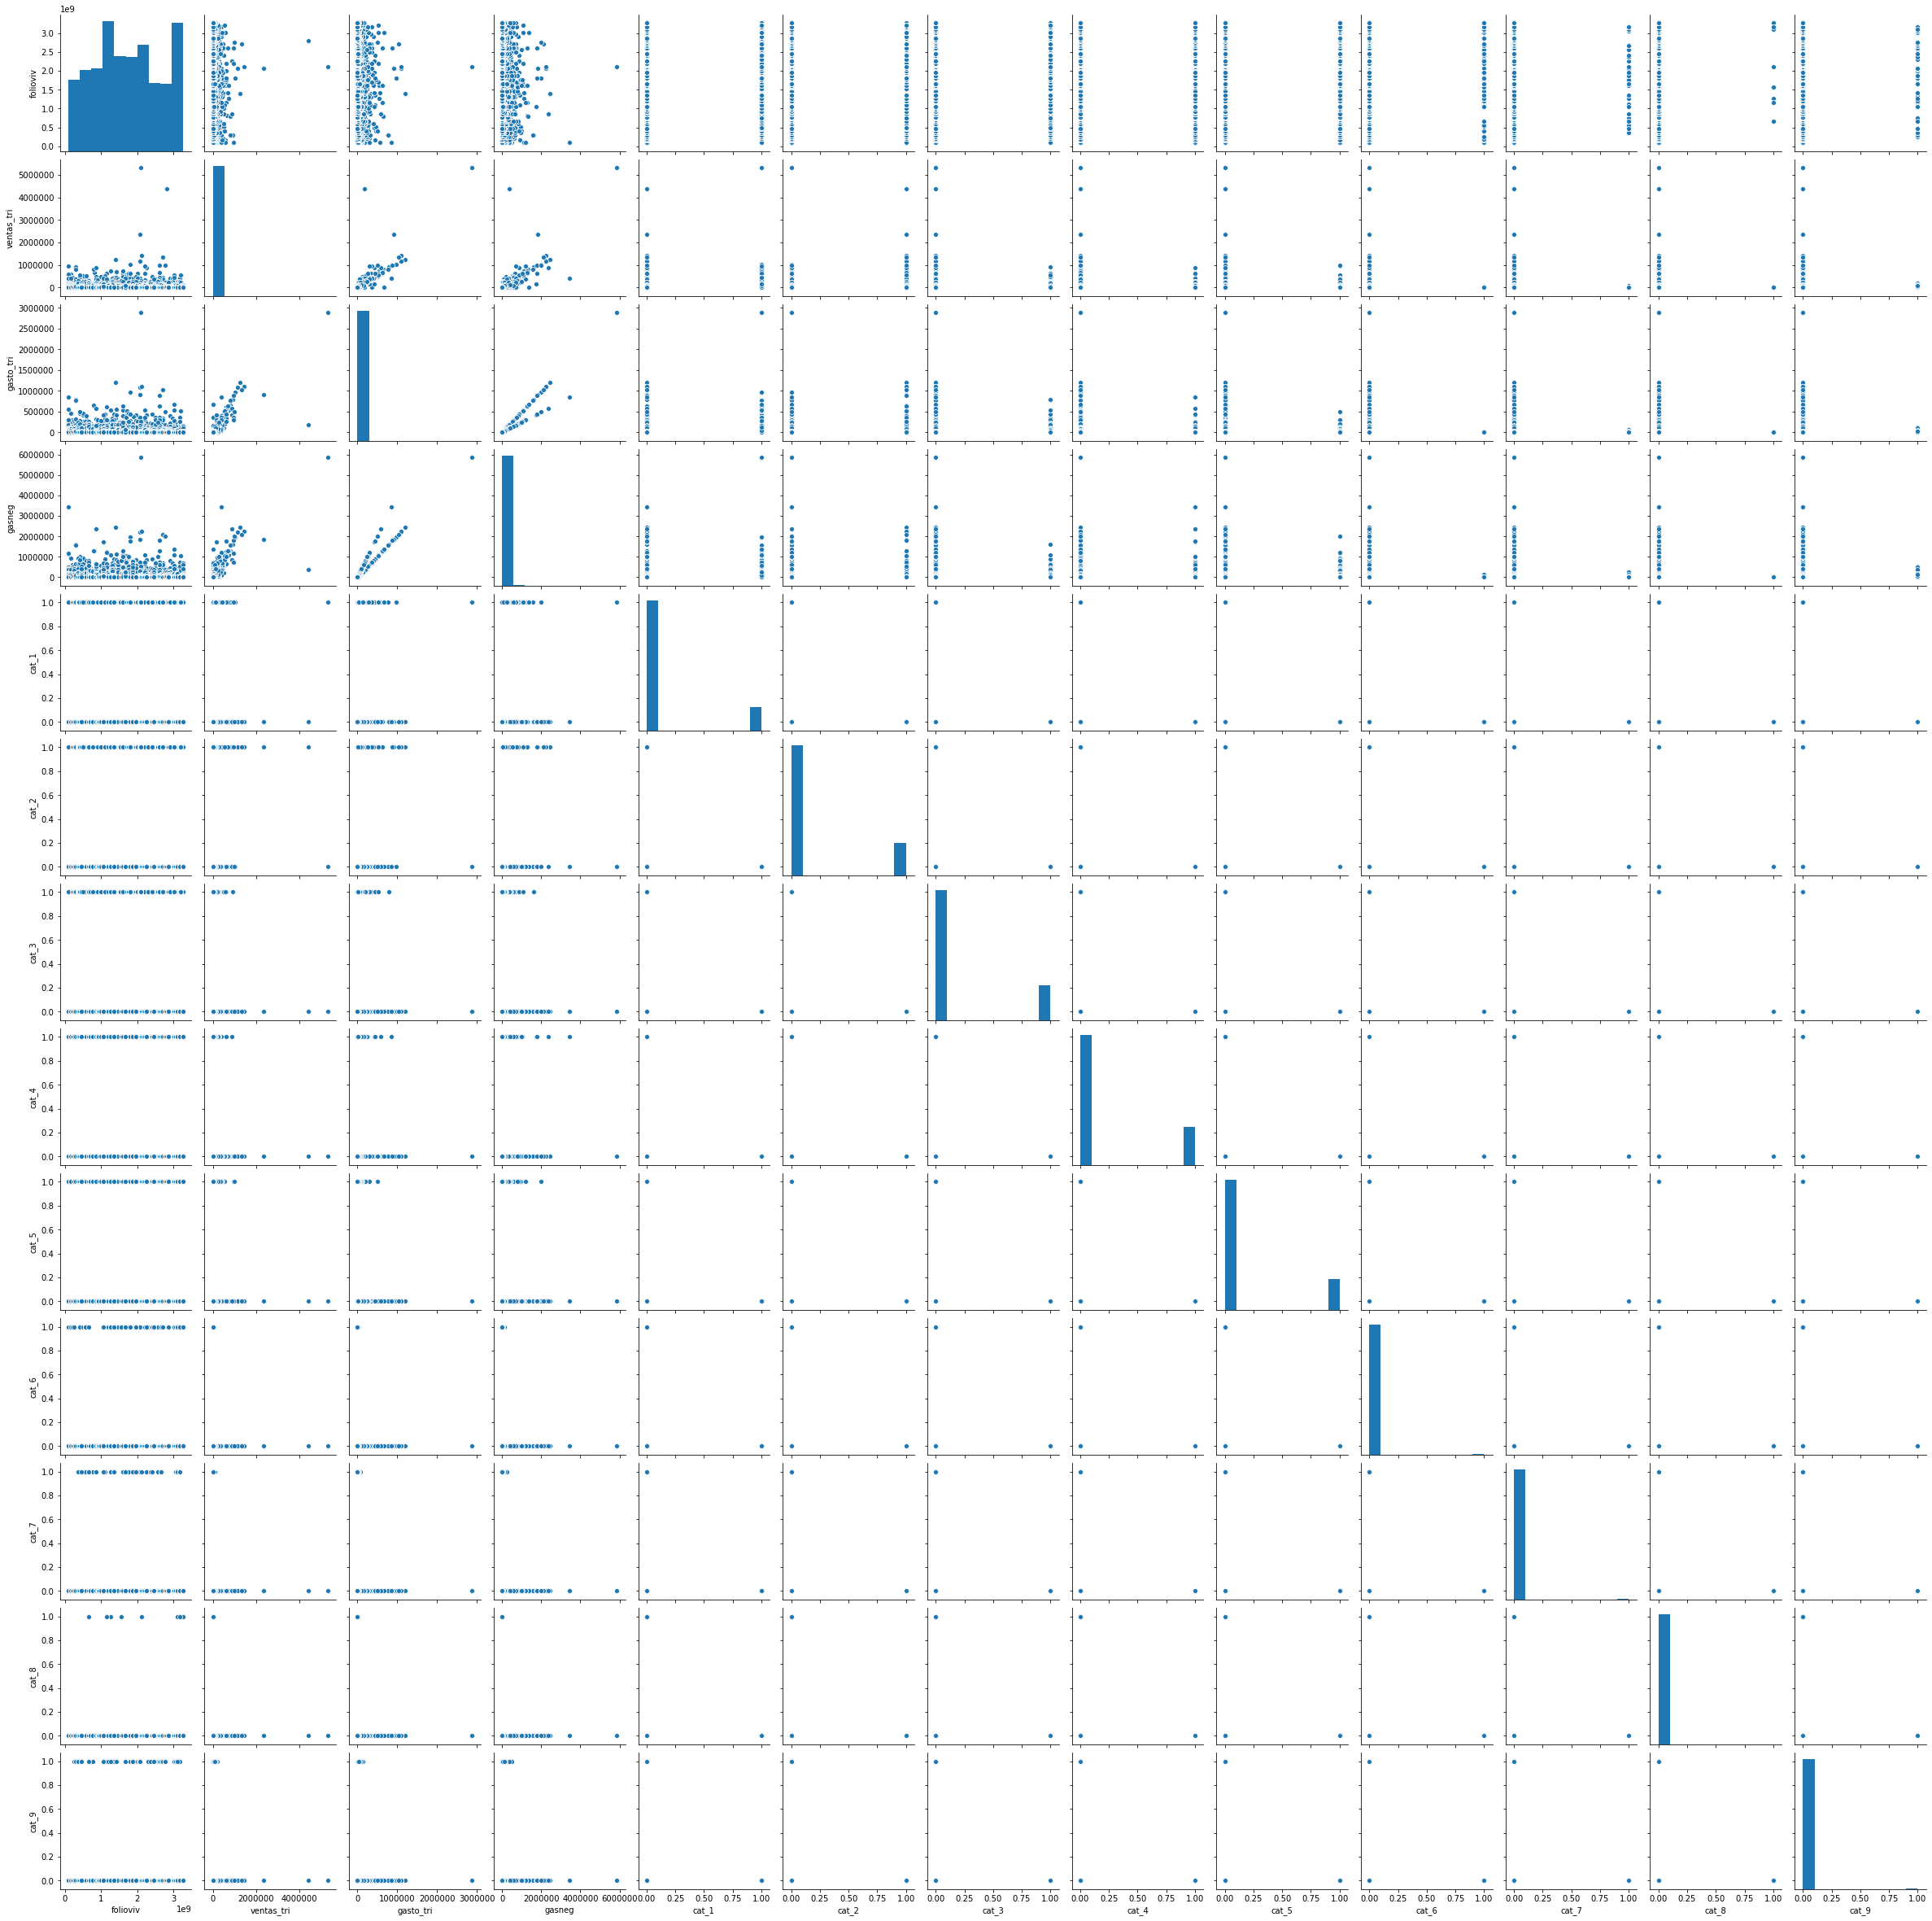

In [57]:
sns.pairplot(data=BonitoDs)

#nube = coninua
#linea = categorica

In [58]:
lin_corr = BonitoDs.corr()
print(lin_corr)

            folioviv  ventas_tri  gasto_tri    gasneg     cat_1     cat_2  \
folioviv    1.000000   -0.024369  -0.031434 -0.035798  0.026244 -0.042265   
ventas_tri -0.024369    1.000000   0.854618  0.819530  0.027267  0.122514   
gasto_tri  -0.031434    0.854618   1.000000  0.966093  0.013965  0.158914   
gasneg     -0.035798    0.819530   0.966093  1.000000 -0.004238  0.122488   
cat_1       0.026244    0.027267   0.013965 -0.004238  1.000000 -0.211912   
cat_2      -0.042265    0.122514   0.158914  0.122488 -0.211912  1.000000   
cat_3      -0.033841    0.051663   0.032474  0.008445 -0.219539 -0.261192   
cat_4       0.030681   -0.101757  -0.095027 -0.050765 -0.228481 -0.271831   
cat_5       0.016414   -0.089569  -0.099129 -0.070354 -0.205066 -0.243974   
cat_6       0.007967   -0.019865  -0.023617 -0.023636 -0.035720 -0.042498   
cat_7       0.027908   -0.011372  -0.011615 -0.009629 -0.021467 -0.025540   
cat_8       0.007983   -0.004178  -0.004797 -0.004881 -0.007104 -0.008452   

In [59]:
#empezamos regresión lineal con machine learning
X = BonitoDs[['gasneg','gasto_tri']]#'cat_1','cat_2','cat_3','cat_4','cat_5','cat_6','cat_8','cat_9']]
y = BonitoDs['ventas_tri']

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

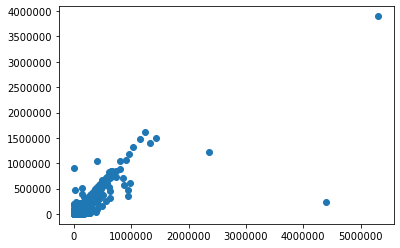

In [61]:
predictions = lm.predict(X)
plt.scatter(y,predictions)

In [62]:
#valores de las betas (pendientes e intercepto)
print(lm.coef_)
print(lm.intercept_)
#los coeficientes los tengo que ver en funcion de mi variable dependiente

[-0.06331805  1.48016136]
2285.240186373181


In [63]:
coeff_dslin = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']) 
coeff_dslin

,Coefficient
gasneg,-0.063318
gasto_tri,1.480161


In [64]:
dslin_predictions = pd.DataFrame({'Actual': y, 'Predicted': predictions})   

In [65]:
#error es la diferencia entre el actual y el estimado(predicted)
#predicted es el valor de y (mi variable dependiente con los valores de las betas que genero el modelo)
dslin_predictions['error'] = dslin_predictions['Actual'] - dslin_predictions['Predicted']

In [66]:
#la media del error me tiene que salir en cero!!!!
dslin_predictions['error'].mean()

-1.231016463693158e-12

In [67]:
#r2 me dice que tanto explicaron a mi variable dependiente las variables independientes que escogi, va del 0 al 1.
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y, predictions)
print(r2)
#solo se explico el 73% del cambio

0.730932772228893


In [68]:
#el error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))

Mean Absolute Error: 6559.296262375214
Mean Squared Error: 940998292.202381
Root Mean Squared Error: 30675.695464037664


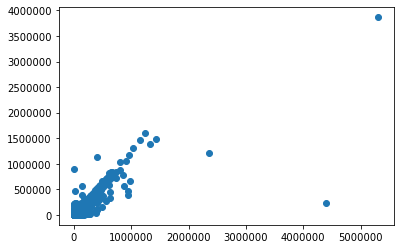

In [69]:
X2 = BonitoDs[[ 'gasto_tri']]
y2 = BonitoDs['ventas_tri']
lm = LinearRegression()
lm.fit(X2,y2)
predictions = lm.predict(X2)
plt.scatter(y2,predictions)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y, predictions)
print(r2)

0.7303725705010344


In [71]:
#modelo de regresión tradicional que me da todas las métricas
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
#Durbin watson me da autocorrelacion 
#el estadistico F prueba la hipotesis nula de que todas las betas son cero si es menor que alfa rechazo esa hipotesis nula
#Cond No. me da la multicolinealidad

                            OLS Regression Results                            
Dep. Variable:             ventas_tri   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 4.316e+04
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:41:12   Log-Likelihood:            -3.7336e+05
No. Observations:               31775   AIC:                         7.467e+05
Df Residuals:                   31772   BIC:                         7.468e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2285.2402    179.695     12.717      0.0

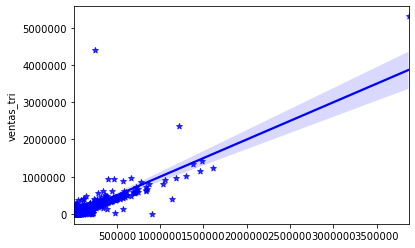

In [72]:
# use the function regplot to make a scatterplot
#Plot data and a linear regression model fit
sns.regplot(x=predictions, y=y,scatter=True, color='b', marker="*")